In this project, we're diving into the exciting world of fraud detection, where we'll build a machine learning model to identify fraudulent credit card transactions. Using a publicly available dataset from **Kaggle**, we'll explore and process the data, train a robust **RandomForestClassifier**, and evaluate its performance. Our goal is to create a model that can effectively differentiate between legitimate and fraudulent transactions, helping businesses stay one step ahead in preventing fraud.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

# Setting pandas to display up to 100 columns when printing dataframes
pd.set_option('display.max_columns', 100)

# Setting random seed value
RANDOM_STATE = 2024

# Simple validation using train_test_split
VALID_SIZE = 0.20
# Test size using_train_test_split
TEST_SIZE = 0.20
# Number of KFolds for cross-validation
NUMBER_KFOLDS = 5

# Metric used for RandomForrestClassifier
RFC_METRIC = 'gini'
# Number of parallel jobs for RandomForestClassifier
NO_JOBS = 4
# Number of estimators used for RandomForestClassifier
NUM_ESTIMATORS = 100

In [3]:
# Loading in our data
data_df = pd.read_csv('../data/creditcard.csv')

In [ ]:
# Viewing our dataset shape
print("Number of Rows: ", data_df.shape[0], " Number of Columns: ", data_df.shape[1])

Number of Rows:  284807  Number of Columns:  31


In [ ]:
# Viewing first 5 rows of our data
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Our data contains 284,807 transactions over 2 consecutive days
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking for missing data
# Filtering and sorting to get the total count of missing values for each column
total = data_df.isnull().sum().sort_values(ascending=False)

# Calculating total number of missing values per column
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)

# Concatenation of the two dataframes
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking for imbalanced data
# Counting number of Fraud vs Not Fraud Class values
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

# Creating barplot for Fraud vs Not Fraud
trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - Data Imbalance",
    marker=dict(color="#56B4E9"),
    text=df['values']
)

# Putting barplot into list for Plotly
data = [trace]

# Defining layout and styling of plot
layout = dict(
    title = 'Credit Card Fraud Class - Data Imbalance',
    title_x = 0.5,
    title_font = dict(size=20),
    xaxis = dict(title = 'Class', showticklabels=True, tickvals = [0, 1], ticktext = ['Not Fraud', 'Fraud']), 
    yaxis = dict(title = 'Number of Transactions'),
    hovermode = 'closest', width=600
)

# Combining data and layout into figure
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

As you can see from our bar chart, only **492** (**0.172%**) of transactions are fraudulent. This makes our dataset highly imbalanced for the target variable class.

In [ ]:
# Plotting transactions in time
# Filtering data for each class
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

# Preparing data for plot
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

# Creating density plot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=['#56B4E9', '#D55E00'])

# Updating plot layout
fig['layout'].update(
    title='Credit Card Transactions Time Density Plot',
    xaxis=dict(title='Time [s]'),
    title_x = 0.5,
    title_font = dict(size=20)
)

# Displaying plot using iplot
iplot(fig, filename='transactions_time_density')

The time density plot illustrates the distribution of credit card transactions over time for both fraudulent and non-fraudulent transactions. As seen in our plot, fraudulent transactions exhibit a more even and spread-out distribution across time, including during the early hours in the European timezone. This suggests that fraudulent transactions are not concentrated at any particular time, but are relatively evenly distributed throughout the day and night. In contrast, valid transactions (Not Fraud) show a more typical peak during the daytime hours, with fewer transactions occurring during the night. This difference in distribution patterns highlights a potential behavioral anomaly for fraud detection.

Now let's dive deeper into the time distribution of transactions for both classes, looking into the aggregated transaction count and amount per hour.

In [ ]:
# Creating a new summarized dataframe for each hour of the day
# Creating an Hour column by dividing Time (in seconds) by 3600
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

# Grouping by Hour and Class
tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)

# Renaming columns
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


Plotting Not Fraud against Fraud transactions.

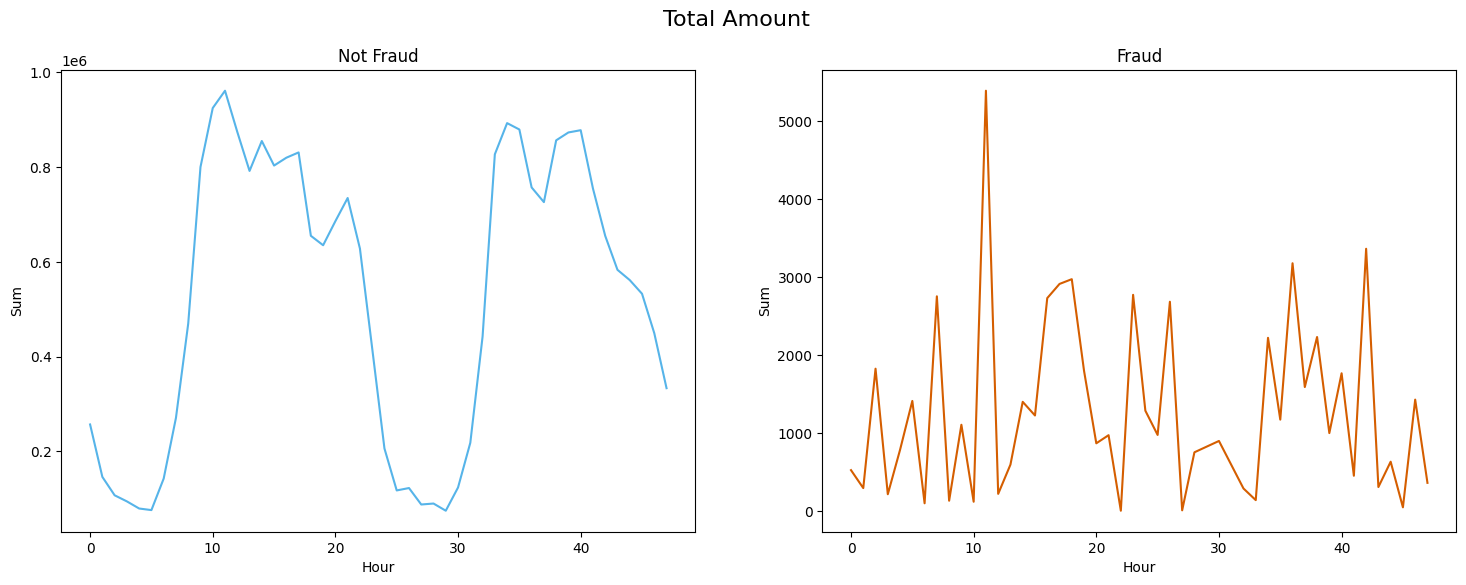

In [ ]:
# Plotting total transaction amounts over time for Fraud and Not Fraud
# Creating figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Creating line plot on first subplot
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0], color="#56B4E9")
ax1.set_title("Not Fraud", fontsize=12)

# Creating line plot on second subplot
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="#D55E00")
ax2.set_title("Fraud", fontsize=12)

# Setting title and displaying plots
plt.suptitle("Total Amount", fontsize=16, x=0.5)
plt.show()

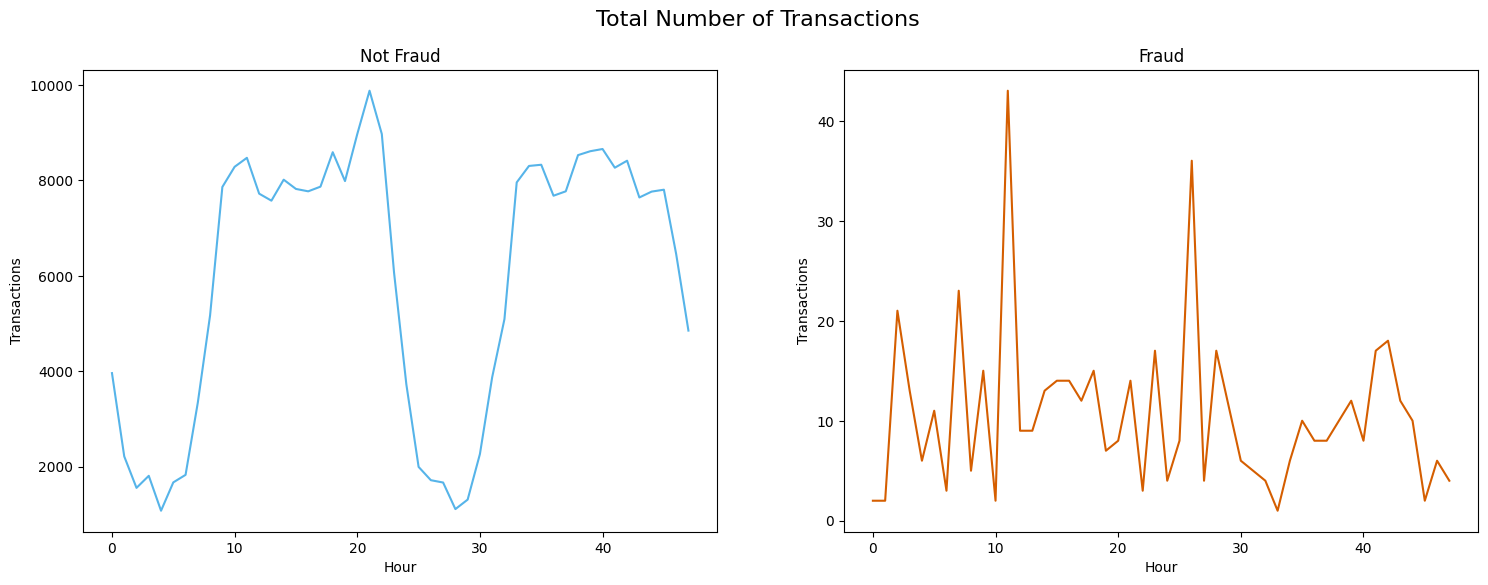

In [ ]:
# Plotting total number of transactions over time for Fraud and Not Fraud
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Creating line plot on first subplot
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0], color="#56B4E9")
ax1.set_title("Not Fraud", fontsize=12)

# Creating line plot on second subplot
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="#D55E00")
ax2.set_title("Fraud", fontsize=12)

# Setting title and displaying plots
plt.suptitle("Total Number of Transactions", fontsize=16, x=0.5)
plt.show()

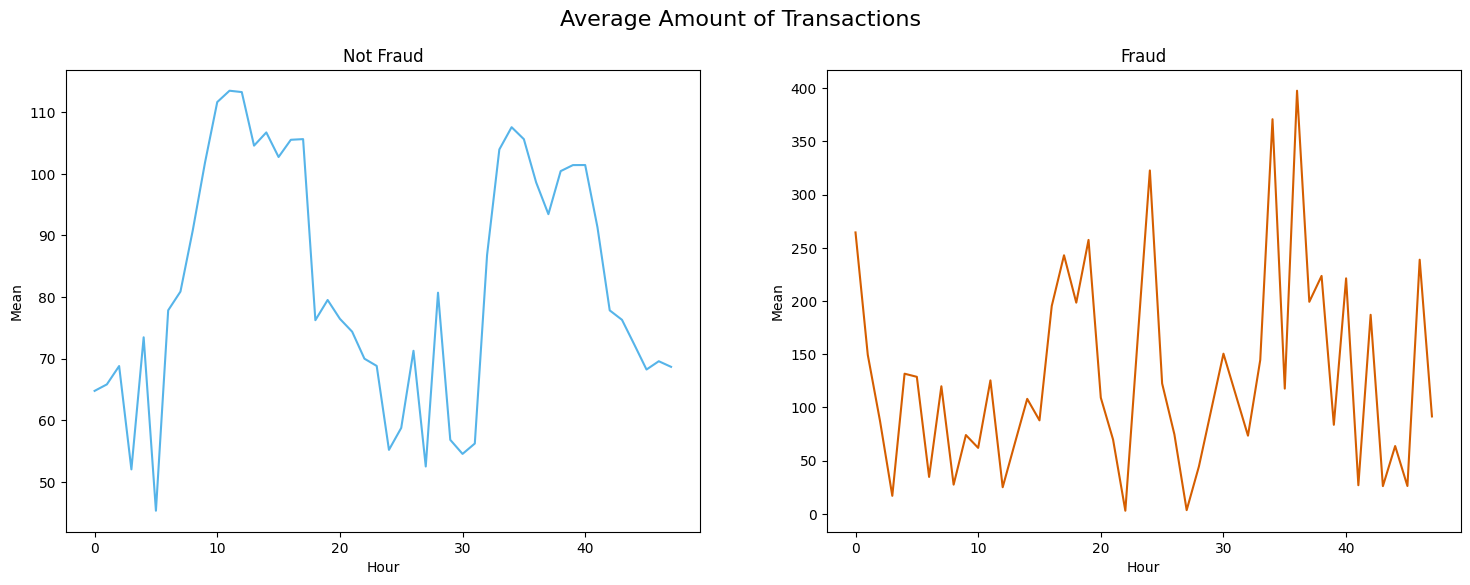

In [ ]:
# Plotting average amount of transactions over time for Fraud and Not Fraud
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Creating line plot on first subplot
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0], color="#56B4E9")
ax1.set_title("Not Fraud", fontsize=12)

# Creating line plot on second subplot
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="#D55E00")
ax2.set_title("Fraud", fontsize=12)

# Setting title and displaying plots
plt.suptitle("Average Amount of Transactions", fontsize=16, x=0.5)
plt.show()

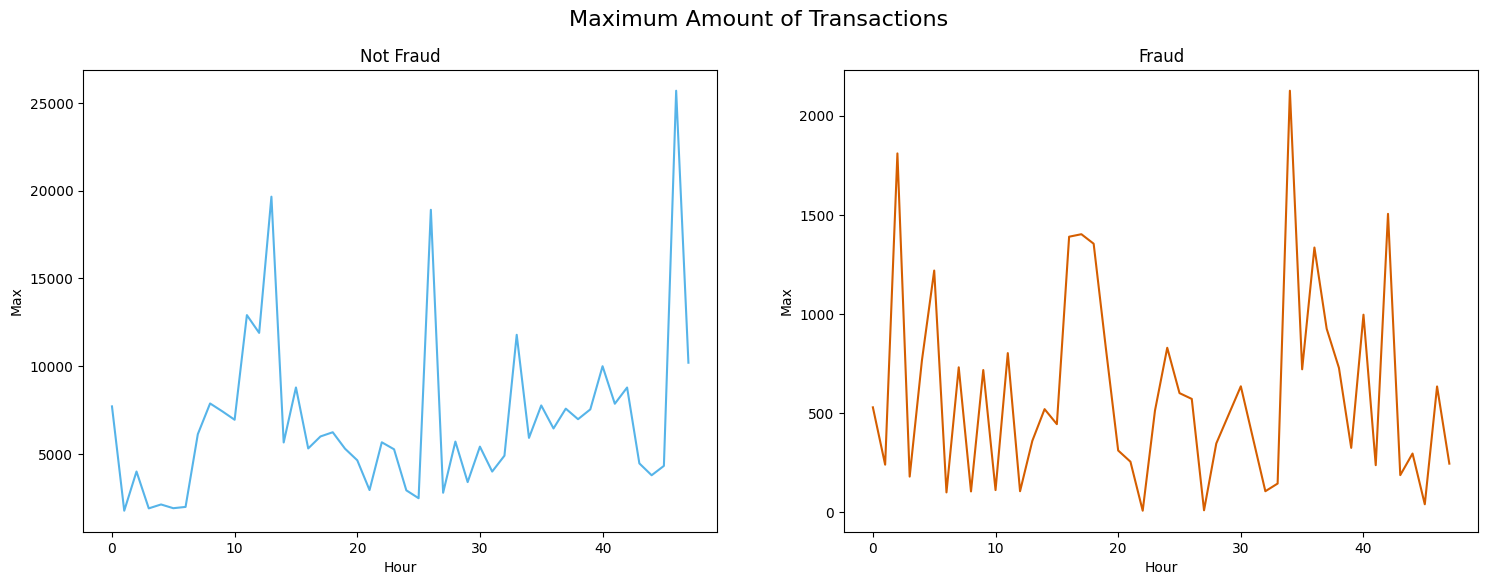

In [ ]:
# Plotting maximum amount of transactions over time for Fraud and Not Fraud
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Creating line plot on first subplot
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0], color="#56B4E9")
ax1.set_title("Not Fraud", fontsize=12)

# Creating line plot on second subplot
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="#D55E00")
ax2.set_title("Fraud", fontsize=12)

# Setting title and displaying plots
plt.suptitle("Maximum Amount of Transactions", fontsize=16, x=0.5)
plt.show()

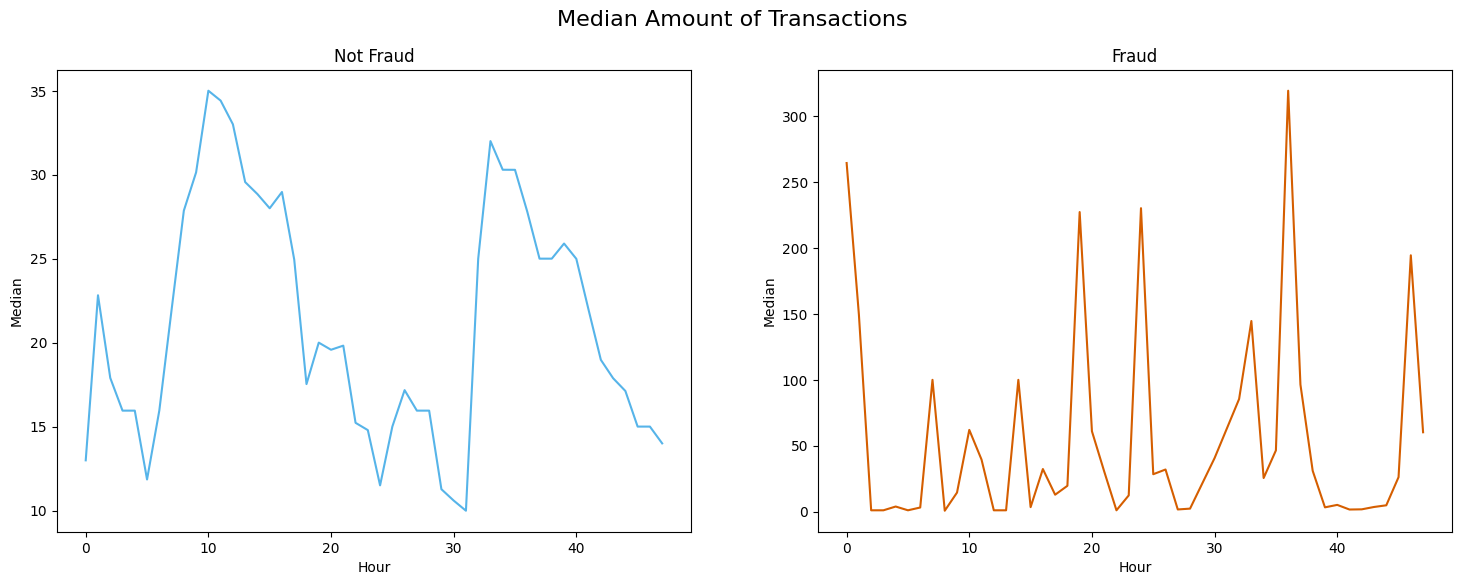

In [ ]:
# Plotting median amount of transactions over time for Fraud and Not Fraud
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Creating line plot on first subplot
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0], color="#56B4E9")
ax1.set_title("Not Fraud", fontsize=12)

# Creating line plot on second subplot
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="#D55E00")
ax2.set_title("Fraud", fontsize=12)

# Setting title and displaying plots
plt.suptitle("Median Amount of Transactions", fontsize=16, x=0.5)
plt.show()

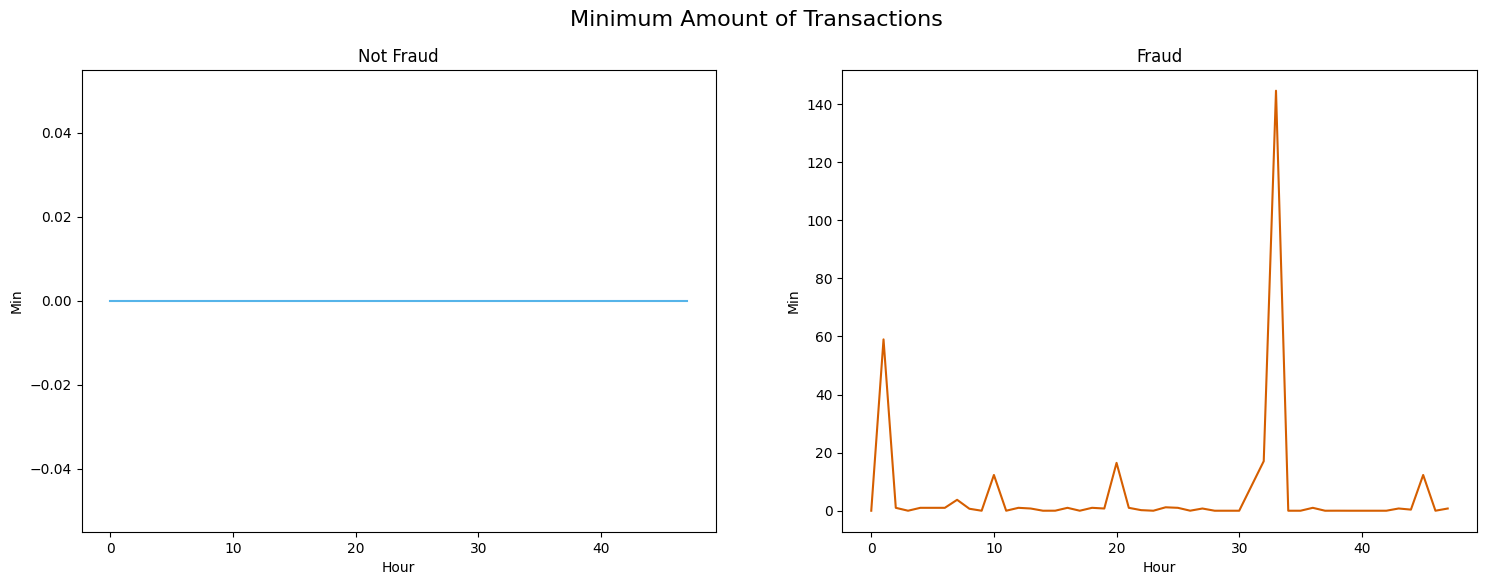

In [ ]:
# Plotting minimum amount of transactions over time for Fraud and Not Fraud
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Creating line plot on first subplot
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0], color="#56B4E9")
ax1.set_title("Not Fraud", fontsize=12)

# Creating line plot on second subplot
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="#D55E00")
ax2.set_title("Fraud", fontsize=12)

# Setting title and displaying plots
plt.suptitle("Minimum Amount of Transactions", fontsize=16, x=0.5)
plt.show()

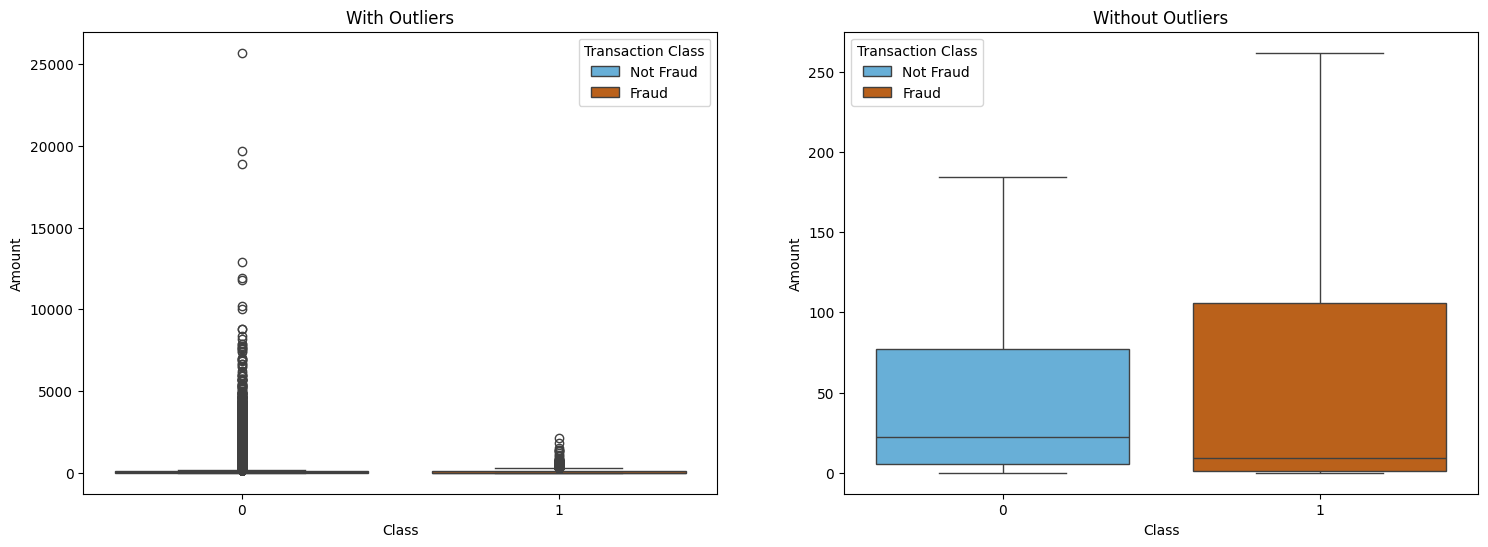

In [ ]:
# Plotting the distribution of transaction amounts for each class
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

custom_palette = {0: "#56B4E9", 1: "#D55E00"}

# Left side includes outliers
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class", data=data_df, palette=custom_palette, showfliers=True)
ax1.set_title("With Outliers", fontsize=12)

# Right side omits outliers
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class", data=data_df, palette=custom_palette, showfliers=False)
ax2.set_title("Without Outliers", fontsize=12)

# Updating legend labels
for ax in [ax1, ax2]:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Not Fraud', 'Fraud'], title="Transaction Class")

# Displaying plots
plt.show()

Now let's take a look at some descriptive statistics for each transaction class.

In [ ]:
# Filtering descriptive statistics for the transaction amounts associated with each class
tmp = data_df[['Amount','Class']].copy()

class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [ ]:
# Not Fraud transactions
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Fraud Transactions
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Legitimate transactions have a higher average value, a larger first quartile **(Q1)**, and exhibit greater variability in their upper range, with more prominent outliers. The fraudulent transactions show a lower average and **Q1**, a higher **Q3**, and less extreme outliers.

Now let's explore how the amounts of fraudulent transactions change over time.

In [ ]:
# Filter out Fraud transactions
fraud = data_df.loc[data_df['Class'] == 1]

# Scatter plot
trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
    marker=dict(
        color='#D55E00',
        line=dict(
            color='#D55E00',
            width=1),
        opacity=0.5,
    ),
    text = fraud['Amount'],
    mode = "markers"
)

# Putting scatter into list for Plotly
data = [trace]

# Scatter plot layout parameters
layout = dict(   
    title = dict(text = 'Amount of Fraudulent Transactions', x = 0.5, font = dict(size=20)),
    xaxis = dict(title = 'Time [s]', showticklabels=True), 
    yaxis = dict(title = 'Amount'),
    hovermode='closest'
)

# Plotting data
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud_amount')

Our scatter plot displays fraudulent transaction amounts against their occurrence times. The orange markers represent individual fraud transactions and their size represents the transaction amount. The distribution of the points shows that fraudulent transactions occur consistently across the entire time span, without a clear pattern as we've seen previously. Additionally, most fraud transactions are relatively small, but a few larger outliers do exist. This type of pattern directly contrasts with the more concentrated timing patterns we observed for non-fraudulent transactions.

Now let's visualize the correlation between features in the dataset using Pearson correlation coefficients.

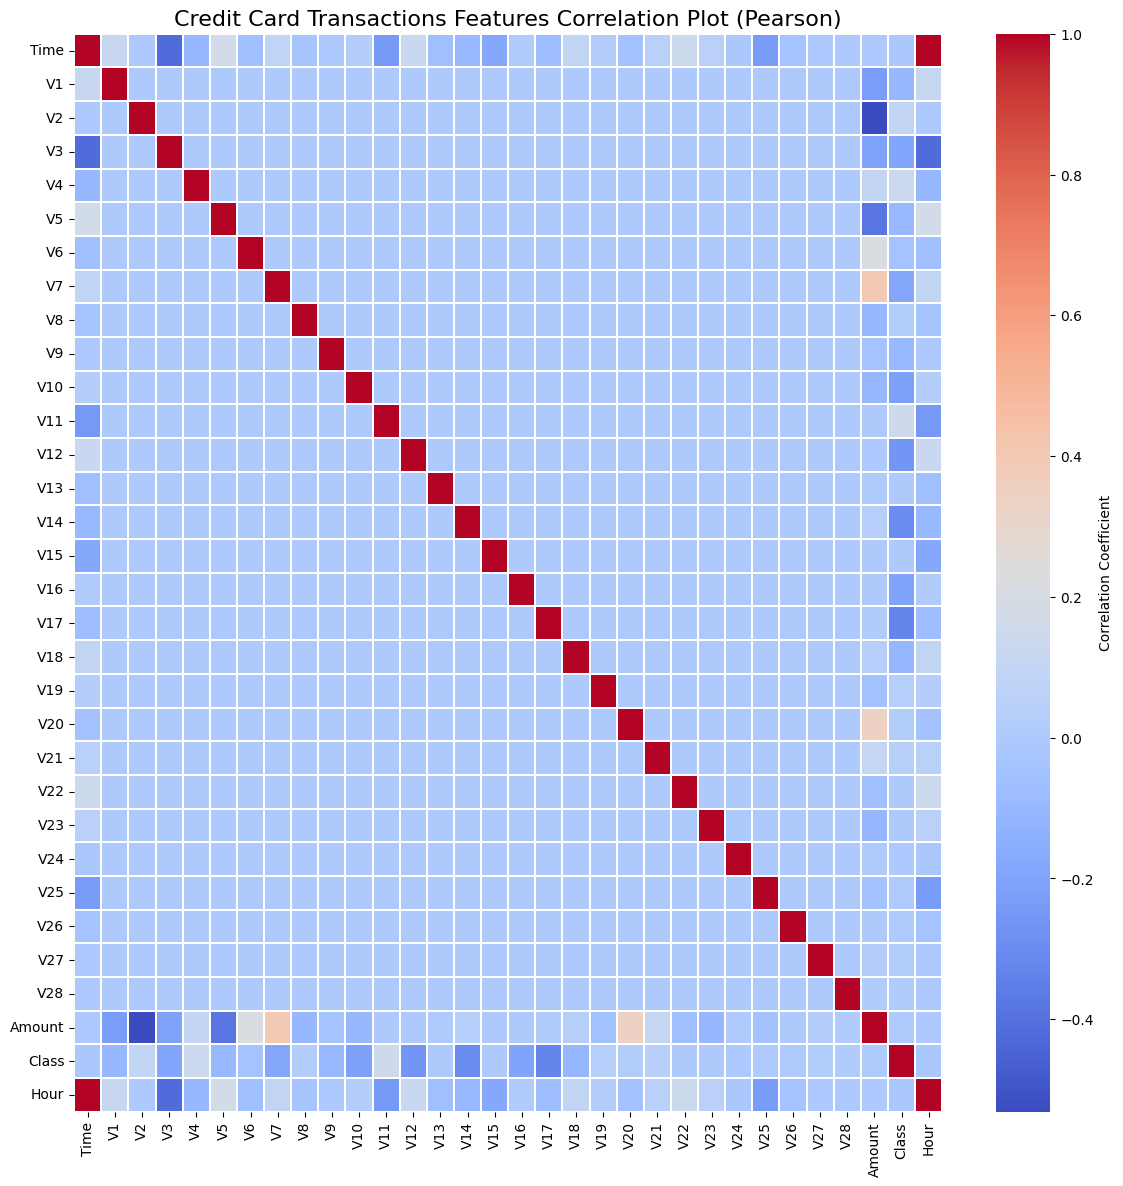

In [ ]:
# Heatmap to visualize correlation between features
plt.figure(figsize = (14,14))

# Adding title to plot
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)', fontsize=16, x=0.5)

# Calculating Pearson correlation coefficients for all feature pairs
corr = data_df.corr()

# Creating heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})

# Displaying plot
plt.show()

Our heatmap above shows the correlations between different features in the out dataset. Darker red cells indicate strong positive correlations while lighter cells or even darker blue cells indicate weaker correlations or potential negative correlations. This helps us identify relationships between variables.

As we expected, we don't see any signicant correlation between the features **V1** to **V28**. However, we do see some interesting correlations with other features like **Time** and **Amount**.

For example, **V3** shows an inverse correlation with **Time**, while **V7** and **V20** have a direct correlation with **Amount**, and **V1** and **V5** have an inverse correlation with **Amount**.

Next let's visualize these correlations.

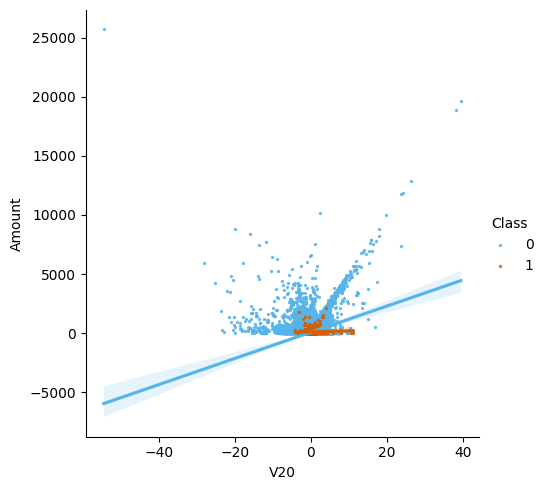

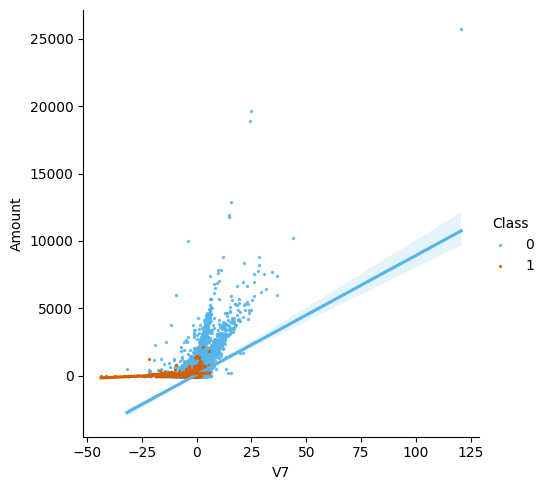

In [ ]:
# Plotting relationship between V20 and Amount
s = sns.lmplot(x='V20', y='Amount', data=data_df, hue='Class', fit_reg=True, scatter_kws={'s':2})

# Plotting relationship between V7 and Amount
s = sns.lmplot(x='V7', y='Amount', data=data_df, hue='Class', fit_reg=True, scatter_kws={'s':2})

# Displaying plot
plt.show()

These two plots show the correlation between **V20** and **Amount**, and **V7** and **Amount**. We can see that the two pairs of features are indeed correlated. The regression lines for the non-fraudulent transactions **(Class = 0)** have a positive slope, while the regression lines for the fraudulent transactions **(Class = 1)** show a smaller positive slope.

Next let's take a look at the features that are inversely correlated.

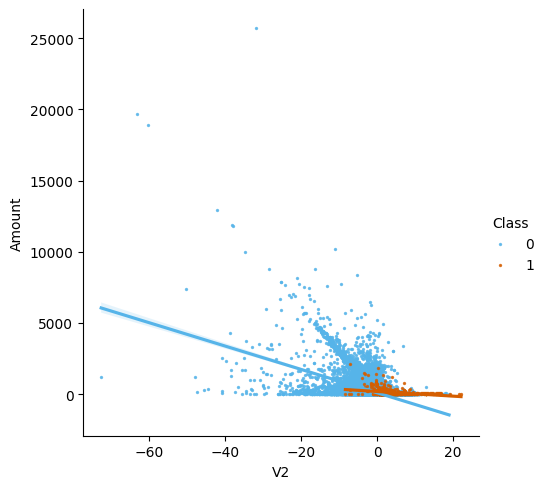

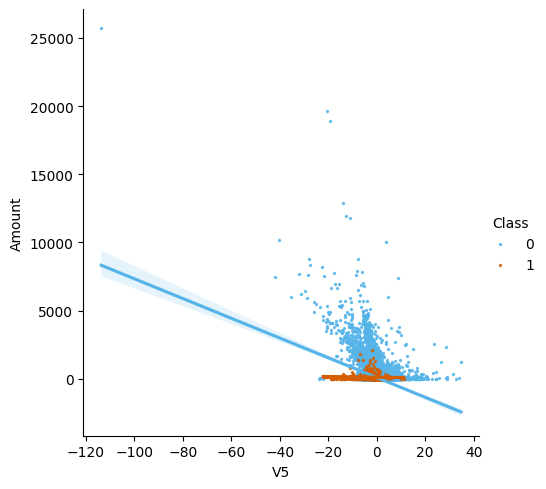

In [ ]:
# Creating scatter plots with a linear regressin line that shows relationship
# Relationship between V2 and Amount
s = sns.lmplot(x='V2', y='Amount', data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})

# Relationship between V5 and Amount
s = sns.lmplot(x='V5', y='Amount', data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})

# Displaying plot
plt.show()

These two plots show the correlation between **V2** and **Amount**, and **V5** and **Amount**. We can see from our plots that the two pairs of features are inversely correlated. The regression lines for non-fraudulent transactions **(Class = 0)** have a negative slope, while the regression lines for fraudulent transactions **(Class = 1)** show only a very slight negative slope.

Now let's plot density plots for all of our features in the dataset.

<Figure size 640x480 with 0 Axes>

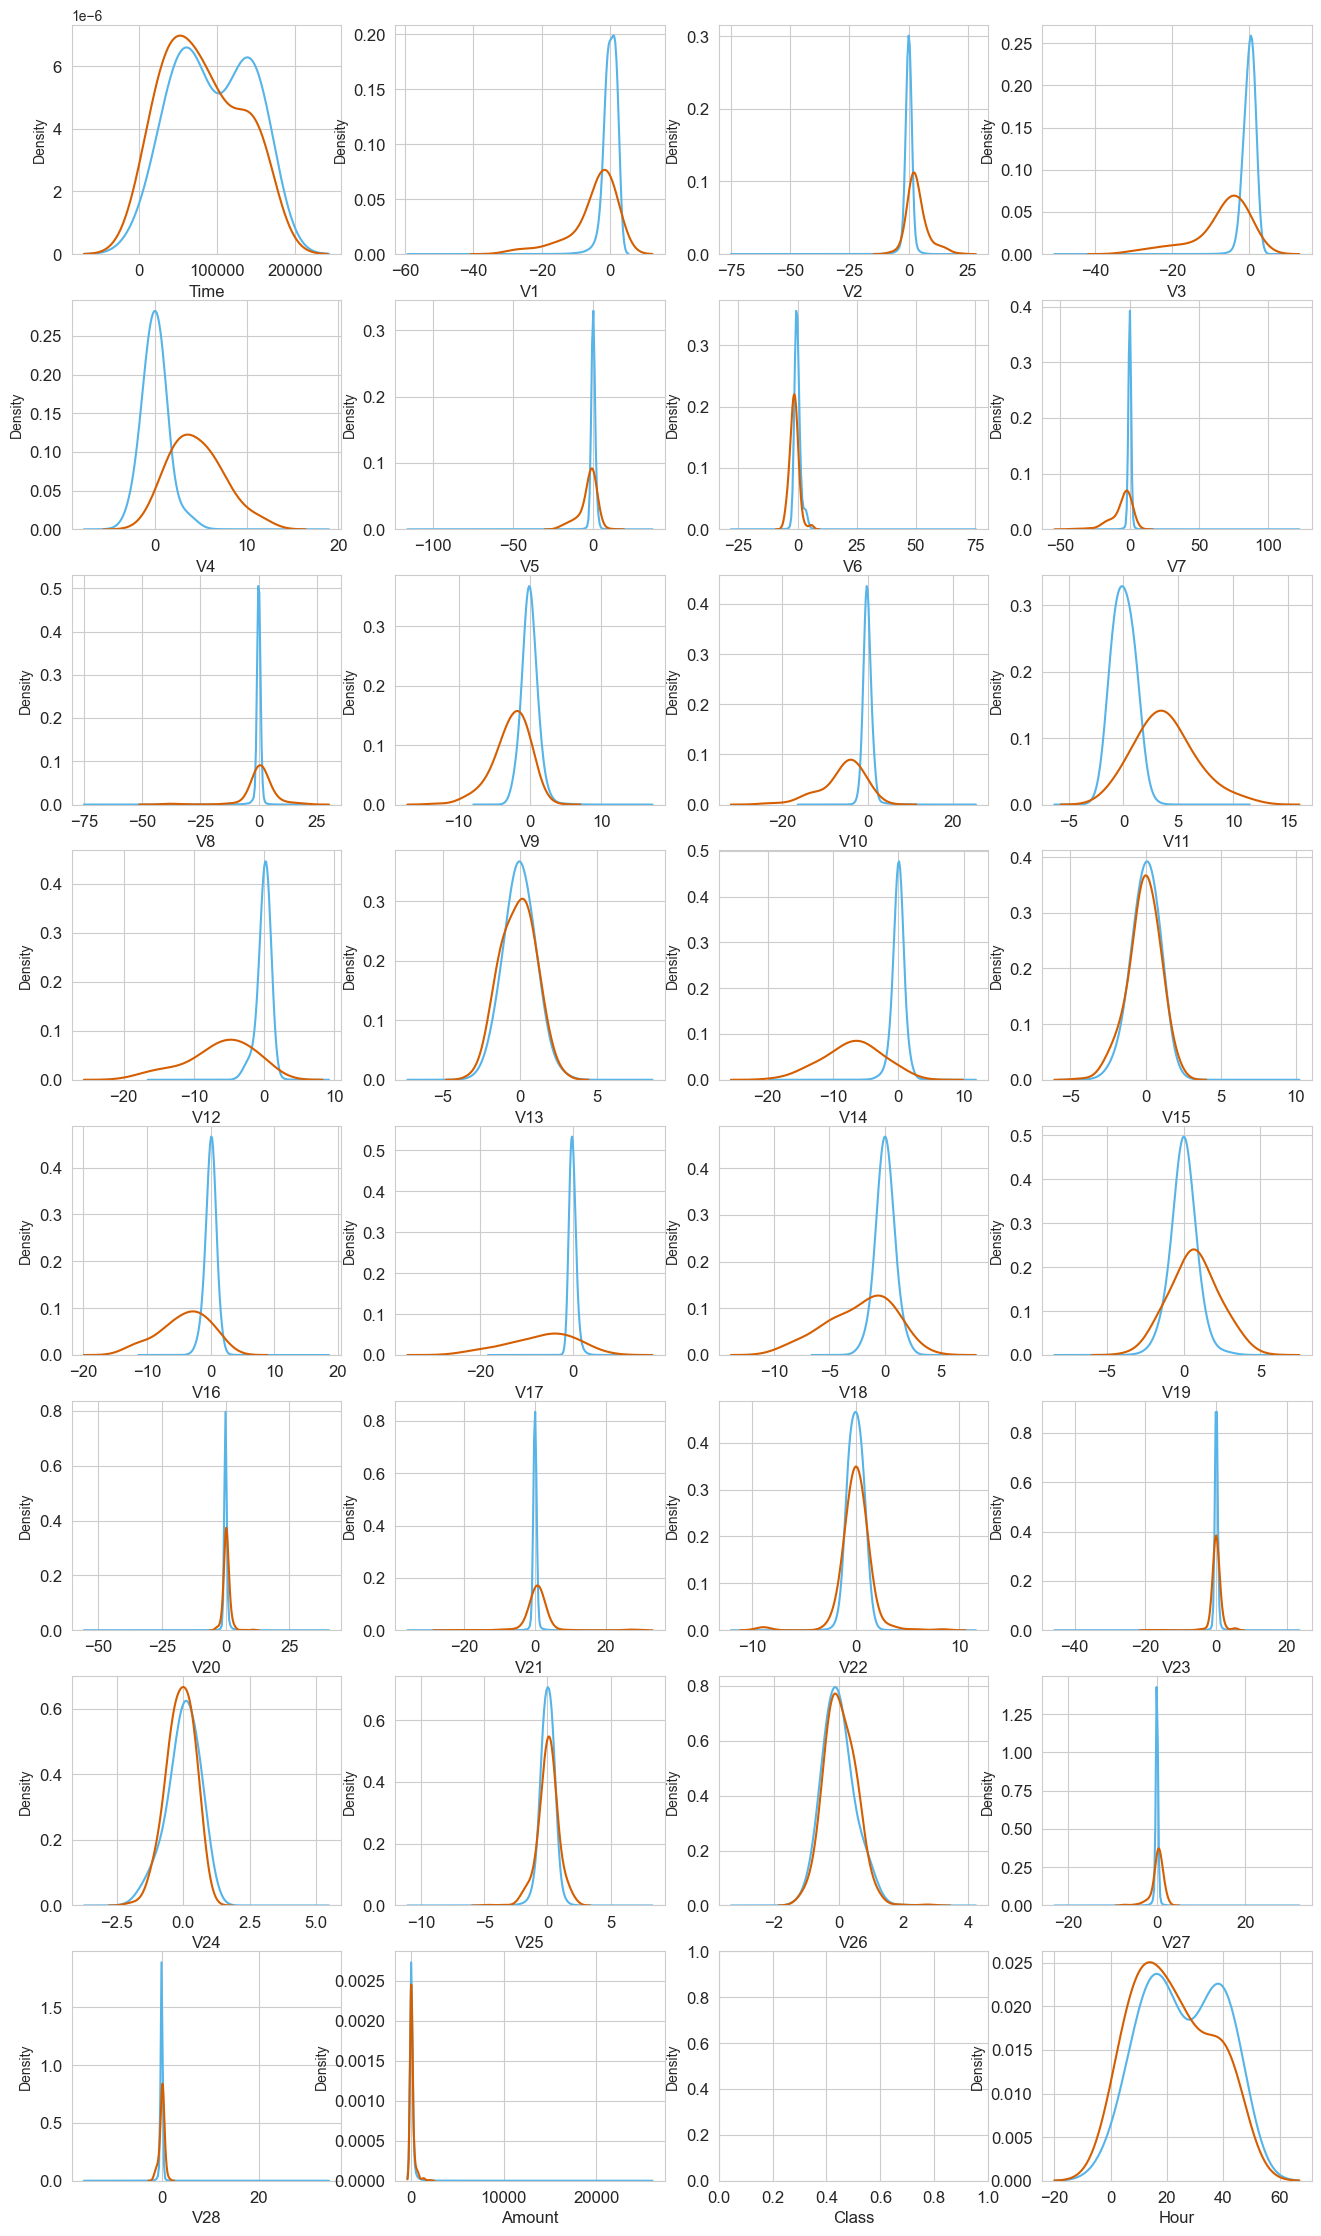

In [ ]:
# Creating 32 KDE plots
# Getting all column names
var = data_df.columns.values

# Splitting dataset into two subsets based on Class
i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

# Setting background style
sns.set_style('whitegrid')

# Displaying plots
plt.figure()

# Creating grid of subplots
fig, ax = plt.subplots(8, 4, figsize=(16,28))

# Iterating over each feature in the dataset and plotting for that feature in both Fraud and Not Fraud
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5, label="Class = 0", warn_singular=False)
    sns.kdeplot(t1[feature], bw_method=0.5, label="Class = 1", warn_singular=False)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying plots
plt.show()

Looking at the feature distributions, we can see some interesting patterns. For example, features like **V4** and **V11** have clearly distinct distributions for the two Class values, **0** and **1**. **V12**, **V14**, and **V18** show partial separation, while **V1**, **V2**, **V3**, and **V10** have quite distinct profiles overall. On the other hand, features like **V25**, **V26**, and **V28** share similar distributions for both Class values.

Overall, with a few exceptions (like Time and Amount), the distribution for non-fraudulent transactions **(Class = 0)** tends to be centered around 0, often with a long tail at one end. Meanwhile, fraudulent transactions **(Class = 1)** typically show a skewed or asymmetric distribution.

Now let's start building our predictive model.

Start by defining the predictors and target variables for our model. The predictors are the features we'll use to make predictions, while the target is the variable we're trying to predict.

In this case, the target is the **"Class"** column, which indicates whether a transaction is Fraud **(Class = 1)** or Not Fraud **(Class = 0)**. All other columns, except for **"Class"** will be our predictors since they contain the information we need to make that prediction.

Since we don’t have any categorical features in this dataset, we can skip that step.

In [75]:
# Defining target variable
target = 'Class'

# Defining predictor variables
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

Then let's split the data into three sets:

* **Train**
* **Validation**
* **Test**

This will help us train the model, tune it, and finally evaluate its performance on unseen data.

In [76]:
# Dividing original dataset into training and test set
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )

# Dividing training set into smaller training set and validation set
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

I've chosen to use the RandomForestClassifier model because it's a versatile and powerful algorithm, especially well-suited for classification tasks like this one. It works well with both numerical and categorical data, handles complex relationships between features, and is less likely to overfit compared to simpler models. Plus, it can provide valuable insights through feature importance, which helps in understanding which variables are driving the predictions.

We'll begin by training the model using the training set and then we'll evaluate it with the validation set.

For the validation, we’ll use the **GINI** index, which is calculated as **GINI = 2 * (AUC) - 1**, where **AUC** stands for the **Receiver Operating Characteristic - Area Under Curve (ROC-AUC)**. The number of estimators will be set to **100**, and we’ll utilize **4** parallel jobs for better performance.

In [ ]:
# Initializng the RandomForestClassifier
clf = RandomForestClassifier(
    n_jobs=NO_JOBS, 
    random_state=RANDOM_STATE,
    criterion=RFC_METRIC,
    n_estimators=NUM_ESTIMATORS,
    verbose=False
)

In [ ]:
# Training RandomForestClassifier using the training data
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2024, verbose=False)

In [80]:
# Predicting the target variables for the validation data
preds = clf.predict(valid_df[predictors])

Feature importance is a really helpful tool when analyzing the performance of our model. It tells us which features have the greatest impact on making predictions, helping us understand what drives the model’s decisions. By knowing which features are most important, we can focus on improving them or potentially reduce less relevant features to streamline the model.

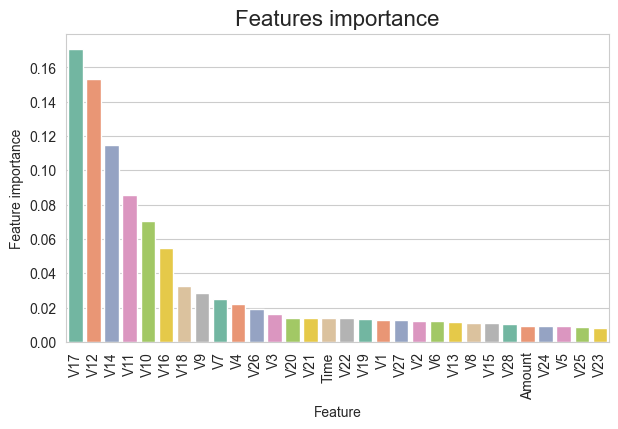

In [ ]:
# Creating dataframe pairing features with importance values
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Creating new figure
plt.figure(figsize = (7,4))
plt.title('Features importance', fontsize=16)

# Generating barplot
s = sns.barplot(x='Feature', y='Feature importance', data=tmp, hue='Feature', palette='Set2', legend=False)

# Rotating feature names
s.set_xticks(range(len(tmp)))
s.set_xticklabels(tmp['Feature'], rotation=90)

# Displaying plot
plt.show()

Our barplot indicates that the most important features are V17, V12, V14, V11, and V16.

Now let's visualize a confusion matrix for the results we've just obtained.

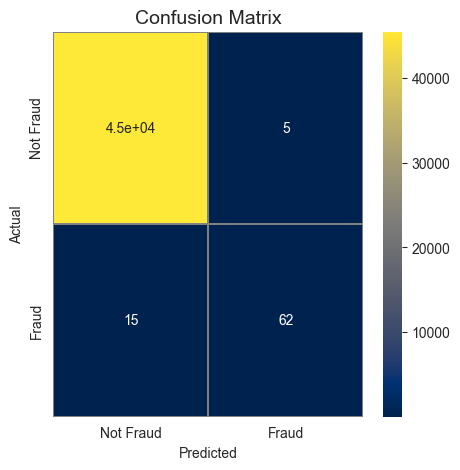

In [86]:
# Creating confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

# Creating the plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

# Creating heatmap from confusion matrix
sns.heatmap(
    cm, 
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Fraud', 'Fraud'],
    annot=True, ax=ax1,
    linewidths=.2, linecolor="gray", cmap="cividis"
)

# Titling and showing plot
plt.title('Confusion Matrix', fontsize=14)
plt.show()

It's important to understand **Type I** and **Type II** errors when working with fraud detection.

* A **Type I** error happens when we mistakenly classify a non-fraudulent transaction as fraud.
* A **Type II** error happens when we fail to idenfity a fraud transaction and mistakenly approve it as non-fraudulent.

Our confusion matrix can be misleading since we're dealing with data that's heavily imbalanced. This forces us to look for other metrics that give us a picture of how our model is performing.

We want to balance these errors as much as possible to make sure we're identifying fraud without disrupting non-fraudulent transactions.

In [89]:
# Calculating ROC-AUC score
print(roc_auc_score(valid_df[target].values, preds))

0.9025424478800897


We’ve now calculated our ROC-AUC score, which came out to be **0.9025**.

This score tells us how well our model is distinguishing between fraudulent and non-fraudulent transactions. A score closer to 1 indicates that the model is performing well, while a score closer to 0.5 means it’s not doing much better than random guessing. In our case, a score of **0.9025** suggests that the model is able to identify fraud with great accuracy.

In wrapping up the project, we’ve built a robust fraud detection model using the RandomForestClassifier.

After exploring and preparing the data, training the model, and evaluating its performance, we’ve achieved a solid ROC-AUC score. The model is performing well in identifying fraud, and with further refinements or additional data, there is potential for even better results. This model is a great step forward in tackling fraud detection efficiently.